# Chapter 6: Multiple Linear Regression - Solution


> (c) 2019-2020 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.
>
> Date: 2020-03-08
>
> Python Version: 3.8.2
> Jupyter Notebook Version: 5.6.1
>
> Packages:
>   - dmba: 0.0.12
>   - matplotlib: 3.2.0
>   - numpy: 1.18.1
>   - pandas: 1.0.1
>   - seaborn: 0.10.0
>   - scikit-learn: 0.22.2
>   - statsmodels: 0.11.1
>
> The assistance from Mr. Kuber Deokar and Ms. Anuja Kulkarni in preparing these solutions is gratefully acknowledged.


In [21]:
# import required functionality for this chapter
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm

import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score #, BIC_score

%matplotlib inline

# Problem 6.1 Predicting Boston Housing Prices 

The file _BostonHousing.csv_ contains information collected by the US Bureau of the Census concerning housing in the area of
Boston, Massachusetts. The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 13 predictors, and the outcome variable is the median house price (MEDV). Table 6.11 describes each of the predictors and the outcome variable.

![TABLE_6.11](img/TABLE_6.11.PNG)


In [23]:
# load the data into a dataframe called housing data
#MISSING 1 line of code
housing_df = pd.read_csv('BostonHousing.csv')

# display column/variable names
#Create a list called columns with all of the housing_df columns names in it
#MISSING 1 line of code
columns = housing_df.columns

print("Variables in the data are: ")
print(columns)

# review first 5 records in the data
print("\nFirst 5 records in the data are:")
#MISSING 1 line of code
housing_df.head()


Variables in the data are: 
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

First 5 records in the data are:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


__6.1.a.__ (Double click and add answers here)

Why should the data be partitioned into training and validation sets? 
<br><b>Answer:</b><br>By partitioning the data into trainin and validation set, allows the user to develop highly accurate models that are relevant also to data that will be collected in the future, not just the data the model was trained on.

What will the training set be used for? 
<br><b>Answer:</b><br> The training set will be used for training the model. 

What will the validation set be used for?
<br><b>Answer:</b><br> The validation set will be used to test the model and evaluate its performance.



__6.1.b.__ Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. Write the equation for predicting the median house price from the predictors in the model.

__Answer:__ y = B0 + B1 * x1 + B2 * x2 + ... Bn * Xn + error      for i = 1,2, ... n.


In [24]:
# select columns for regression analysis
outcome = 'MEDV'
predictors = ['CRIM', 'CHAS', 'RM']

#Create a dataframe called x containing the predictor columns
#MISSING 1 line of code
x = housing_df[predictors]
#Create a dataframe (technically a series) containing the outcome variable. Call it y
#MISSING 1 line of code
y = housing_df[outcome]


In [25]:
#Create a model called housing_lm and set it to be a LinearRegression() model
#MISSING 1 line of code
housing_lm = LinearRegression()
# fit the regression model y on x
#MISSING 1 line of code
housing_lm.fit(x, y)
# print the intercept
#MISSING 1 line of code
print(housing_lm.intercept_)
#print the list of predictor columns and the coefficients
#MISSING 1 line of code
print(housing_lm.coef_)

-28.810682506359125
[-0.26072441  3.76303705  8.27817981]


__6.1.c.__ Using the estimated regression model, what median house price is predicted for a tract in the Boston area that does not bound the Charles River, has a crime rate of 0.1, and where the average number of rooms per house is 6?

__Answer:__ 

In [26]:
new_df = pd.DataFrame(
                        [[0.1, 0, 6]],
                        columns=['CRIM', 'CHAS', 'RM']
                        )
new_df

,CRIM,CHAS,RM
0,0.1,0,6


In [27]:
#Run the prediction model that you created using the above created dataframe containing
# the new predictor values the the results housing_lm_pred
#MISSING 1 line of code
housing_lm_pred = housing_lm.predict(new_df.values)

print('Predicted value for median house price based on the model built using  dataset is:', housing_lm_pred)

Predicted value for median house price based on the model built using  dataset is: [20.83232392]


The predicted value of median house price based on the model built using training dataset is $20832.32.

__6.1.d.i.__ Reduce the number of predictors:
Which predictors are likely to be measuring the same thing among the 13 predictors? Discuss the relationships among INDUS, NOX, and TAX.

__Answer:__ 
?????


__6.1.d.ii.__ Compute the correlation table for the 12 <b><font color="red">numerical</font></b> predictors and search for highly correlated pairs. These have potential redundancy and can cause multicollinearity. Choose which ones to remove based on this table.

__Answer:__
RM, PTRATIO

In [8]:
# variables in the data
housing_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [13]:
# Create a new dataframe called predictors_df with only numerical predictors
#MISSING 1-5 lines of code (many different ways we have done this before)
predictors_df =  housing_df.iloc[:, np.r_[0:3, 4:12]]

predictors_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

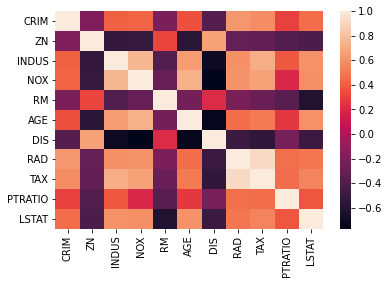

In [16]:
#Create a correlation table called corr using the predictors_df dataframe
#MISSING 1 line of code
corr = predictors_df.corr()
# Use seaborn to create a correlation/heatmap (color and such does not matter)
#MISSING 1 line of code
sns.heatmap(corr);


In [17]:
# correlation table
corr

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044


If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. From the above table, the pairs of highly correlated variables are:

1) INDUS - NOX

2) INDUS - TAX

3) NOX - AGE

4) NOX - DIS

5) AGE - DIS

6) RAD - TAX

According to the correlation table, we might be able to remove some variables that do not add much information to others that we keep. We might remove RM, PTRATIO which have a weak correlation with all the other variables. 

__6.1.d.iii.__ Use three subset selection algorithms: backward, forward, and stepwise to reduce the remaining predictors as follows: Run stepwise on the training set. Choose the top model from each stepwise run. Then use each of these models separately to predict the validation set. Compare RMSE, MAPE, and mean error, as well as historgrams of the errors. Finally, describe the best model.

__Answer:__

In [19]:
# partition the data into training (60%) and validation (40%) sets
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
outcome = 'MEDV'

# partition the data
#Create a dataframe called X with the columns in the predictors[] list above
# Make sure to turn text columns (categorical) values into dummy variable columns
#MISSING 1 line of code
X = pd.get_dummies(housing_df[predictors])

#Create a dataframe (technically a Series) called y containing the outcome column
#MISSING 1 line of code
y = housing_df[outcome]

#Split the data into 40/60 validation and training datasets with a random state of 1
#MISSING 1 line of code
train_X,  valid_X,train_y, valid_y =  train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (303, 12) Validation set: (203, 12)


NOTE: There is currently no support in scikit-learn or statsmodels for stepwise regression. It is however straightforward to 
implement such an approach in a few lines of code using the `dmba` implementation.

In [12]:
# backward elimination

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

#Run the backward_elimination function created by the author and shown in Ch06
#MISSING 1 line of code


print("Best Subset:", best_variables)


Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=1807.23
Step: score=1805.30, remove AGE
Step: score=1803.57, remove INDUS
Step: score=1803.57, remove None
Best Subset: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [13]:
# forward selection
# The initial model is the constant model - this requires special handling in train_model and score_model

#Write the train_model function (starting with "def") shown in the examples for Ch 06
#MISSING 6 lines of code
def .......

#Write the score_model function (starting with "def") shown in the examples for Ch 06
#MISSING 4 lines of code
def .....

#Run the forward_selection function created by the author and shown in Ch06
#MISSING 1 line of code

print("Best Subset:", best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, add None
Best Subset: ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']


In [14]:
# stepwise (both) method

#Run the stepwise_selection function created by the author and shown in Ch06
#MISSING 1 line of code

print("Best Subset:", best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1817.90, add DIS
Step: score=1811.82, add ZN
Step: score=1810.16, add CRIM
Step: score=1808.01, add RAD
Step: score=1803.57, add TAX
Step: score=1803.57, unchanged None
Best Subset: ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']


Above we see that all three subset selection methods gave the same best subset/model:
Each model is designed using the following 10 variables: LSTAT, RM, PTRATIO, CHAS, NOX, DIS, ZN, CRIM, RAD, TAX. 

In [15]:
# Re-run the Regression but this time fit the model with best subset variables from the 
#  subset reductions from above

#Define the outcome and predictor variables
outcome = 'MEDV'
predictors = ['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'DIS', 'ZN', 'CRIM', 'RAD', 'TAX']

#Create a dataframe called X containing the new predictor columns
#MISSING 1 line of code

#Create a dataframe (Series) called y containing the outcome column.
#MISSING 1 line of code

# fit the regression model y on X
#MISSING 2 lines of code


# print the intercept
#MISSING 1 line of code

#print the predictor column names and the coefficients
#MISSING 1 line of code


# print performance measures (training set)
print("\nModel performance on training data:")
#MISSING 1 line of code


# predict prices in validation set, print first few predicted/actual values and residuals
#MISSING 1 line of code


result = pd.DataFrame({'Predicted': house_lm_pred, 'Actual': valid_y, 'Residual': valid_y - house_lm_pred})

# print performance measures (validation set)
print("\nModel performance on validation data:")
#MISSING 1 line of code




intercept 38.95615649828231
  Predictor  coefficient
0     LSTAT    -0.514444
1        RM     3.480964
2   PTRATIO    -0.804964
3      CHAS     2.359986
4       NOX   -17.866926
5       DIS    -1.438596
6        ZN     0.066221
7      CRIM    -0.114137
8       RAD     0.262455
9       TAX    -0.011166

Model performance on training data:

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.5615
            Mean Absolute Error (MAE) : 3.1662
          Mean Percentage Error (MPE) : -3.4181
Mean Absolute Percentage Error (MAPE) : 16.4898

Model performance on validation data:

Regression statistics

                      Mean Error (ME) : -0.0393
       Root Mean Squared Error (RMSE) : 5.0771
            Mean Absolute Error (MAE) : 3.5746
          Mean Percentage Error (MPE) : -5.1561
Mean Absolute Percentage Error (MAPE) : 16.9733
